# 특정 10개의 자동차 제조업체 기업의 특허 네트워크분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = ['citation.csv','us_patent.csv','inventor.csv',
           'assignee.csv','abstract.csv','ipc.csv' ]
# df_patent = pd.read_csv('./data_1/us특허.csv')

In [3]:
# 각 data에 대한 dataframe 생성
df_citation = pd.read_csv('./data_1/citation.csv')
df_us_patent = pd.read_csv('./data_1/us_patent.csv')
df_assignee = pd.read_csv('./data_1/assignee.csv')
# df_inventor = pd.read_csv('./data_1/inventor.csv')
# df_abstract = pd.read_csv('./data_1/abstract.csv')
# df_ipc = pd.read_csv('./data_1/ipc.csv')

## 특허 - 출원인 데이터 탐색

In [4]:
df_assignee

,특허등록번호,출원인ID,출원인이름,출원인성씨,출원인소속
0,9532496,org_thJgGtYIB6Okpse3uyeZ,NaN,NaN,Precision Planting LLC
1,9532497,org_rGsPEmN5PdH34U7rHYK7,NaN,NaN,AGCO GmbH & Co.
2,9532498,org_tE55mE8SjYRSk3E6empq,NaN,NaN,"Great Plains Manufacturing, Incorporated"
3,9532499,org_kpuqdJOjH9U2EivzyfJz,NaN,NaN,Deere & Comany
4,9532500,org_vxoy7IFXZd5fwds8DHIw,NaN,NaN,"Repreve Renewables, LLC"
...,...,...,...,...,...
310603,9854716,org_FWzt4nKvdw5HhQwmig3O,NaN,NaN,Dell Products L.L.P.
310604,9854717,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,"Ford Global Technologie, LLC"
310605,9854718,org_xtMNpaYbm9atKzTIyEPq,NaN,NaN,"Clean Wave Technologies, Inc."
310606,9854719,org_OW3mt7Gnq4UOKCLkQwn5,NaN,NaN,Realtex Semiconductor Corp.


    자동차 제조업체의 정확한 특허 출원 소속명을 확인하기 위해
    최소한의 식별 가능한 회사명 키워드를 아래와같이 리스트로 만들었습니다.
    assignee데이터에서 해당 키워드를 가진 특허 출원인소속을 탐색했습니다.

In [5]:
# 특정 10개 자동차 회사 선정
co = ['General Motors',
'Daimler', 
'Honda Motor',
'Toyota Motor',
'Tesla',
'Volkswagen',
'Porsche',
'Bayerische',
'Hyundai',
'Kia']

In [6]:
# assignee 데이터에 등록 된 모든 출원인소속 파악하여 위의 자동차 회사 이름 찾기 
assignee_count = ''
for i in range(len(df_assignee['출원인소속'])):
    assignee_count += (str(df_assignee['출원인소속'][i])+'$!@#')
assignee_counts = assignee_count.split('$!@#')
companies = list(set(assignee_counts))

# 위에서 구한 출원인소속(companies)에서 특정 10개 업체 찾기
car = []
for j in co:
    for i in companies:
        if i.find(j) != -1:
            print(i)
            car.append(i)
car 

General Motors LLC
Daimler-Benz Aktieqesellschaft
Honda Motors
Toyota Motor Sales, U.S.A., Inc.
Toyota Motor Corp.
Toyota Motor Engineering & Manufacturing North American, Inc.
Toyota Motor Sales, U.S.A.
Tesla Engineering Limited
Tesla Motors
Tesla Nanocoatings, Inc.
Tesla, Inc.
Volkswagen AG and Audi AG
Volkswagen
Dr. Ing.h.c.F. Porsche AG
Hyundai Engineering & Construction Co., Ltd.
Hyundai America Technical Center, Inc.
Hyundai Synthetic Co., Ltd.
Hyundai Steel Company
Hyundai Pharm Co., Ltd.
Hyundai Heavy Industries Co., Ltd.
Hyundai Construction Equipment Co., Ltd.
Hyundai Mobis
Hyundai Electric & Energy Systems Co., Ltd.
Hyundai Translead
Hyundai Dynos Incorporated
Hyundai Motor Company Kolonglotech, Inc.
Hyundai Autron Company, Ltd.
Hyundai-Powertech Co., Ltd.
Hyundai Engineering Co., Ltd.
Hyundai Card Co., Ltd.
Hyundai Wia Corporation
Hyundai Motor Campany
Hyundai Motor Europe Technical Center GmbH
Sharp Kabushiki Kiasha
Kia Motor Corporation
Kiadis Pharma Canada Inc.
Toyota Ji

['General Motors LLC',
 'Daimler-Benz Aktieqesellschaft',
 'Honda Motors',
 'Toyota Motor Sales, U.S.A., Inc.',
 'Toyota Motor Corp.',
 'Toyota Motor Engineering & Manufacturing North American, Inc.',
 'Toyota Motor Sales, U.S.A.',
 'Tesla Engineering Limited',
 'Tesla Motors',
 'Tesla Nanocoatings, Inc.',
 'Tesla, Inc.',
 'Volkswagen AG and Audi AG',
 'Volkswagen',
 'Dr. Ing.h.c.F. Porsche AG',
 'Hyundai Engineering & Construction Co., Ltd.',
 'Hyundai America Technical Center, Inc.',
 'Hyundai Synthetic Co., Ltd.',
 'Hyundai Steel Company',
 'Hyundai Pharm Co., Ltd.',
 'Hyundai Heavy Industries Co., Ltd.',
 'Hyundai Construction Equipment Co., Ltd.',
 'Hyundai Mobis',
 'Hyundai Electric & Energy Systems Co., Ltd.',
 'Hyundai Translead',
 'Hyundai Dynos Incorporated',
 'Hyundai Motor Company Kolonglotech, Inc.',
 'Hyundai Autron Company, Ltd.',
 'Hyundai-Powertech Co., Ltd.',
 'Hyundai Engineering Co., Ltd.',
 'Hyundai Card Co., Ltd.',
 'Hyundai Wia Corporation',
 'Hyundai Motor Campa

    위에서 키워드를 가진 업체를 탐색하였고, 자동차 제조 업체의 기술 회사가 아닌 회사들은 제거했습니다.
    
    회사의 이름을 필터링 후 다음과 같이 확정하였습니다.
    확정한 회사에서 출원한 특허의 개수를 count 했습니다. 
    이때, GM의 특허수가 생각보다 너무 적어 다시 조사를 했고, 조사결과 GM의 RnD회사인 
    GM Global Technology Operating와 Ford, Toyota Jidohsa Kabushiki Kaisha 1943를 추가했습니다.
    그리고 Hyundai Motor와 Hyundai 미국 기술 센터를 제외한 현대사의 업체를 제거했습니다.

In [7]:
# 위에서 찾은 업체의 이름을 포함하는 회사 중 자동차 제조업체의 기술 회사 추리고, 추가하여 각 회사별 특허 수 파악
auto_companies = ['General Motors LLC',
'GM Global Technology Operating LLC',
'Ford Global Technologie',
'Daimler-Benz Aktieqesellschaft',
'Honda Motors',
'Toyota Motor Engineering & Manufacturing North American, Inc.',
'Toyota Jidohsa Kabushiki Kaisha',
'Tesla, Inc.',
'Tesla Motors',
'Volkswagen',
'Dr. Ing.h.c.F. Porsche AG',
'Hyundai America Technical Center, Inc.',
'Hyundai Motor Campany',
'Kia Motor Corporation']

for i in auto_companies:
    print(i, len(df_assignee[df_assignee['출원인소속'].str.contains(i,na=False)]))

General Motors LLC 38
GM Global Technology Operating LLC 1057
Ford Global Technologie 1844
Daimler-Benz Aktieqesellschaft 64
Honda Motors 898
Toyota Motor Engineering & Manufacturing North American, Inc. 266
Toyota Jidohsa Kabushiki Kaisha 1943
Tesla, Inc. 24
Tesla Motors 6
Volkswagen 112
Dr. Ing.h.c.F. Porsche AG 85
Hyundai America Technical Center, Inc. 10
Hyundai Motor Campany 1284
Kia Motor Corporation 273


## 자동차 제조업체 회사 선정
    제가 관심있는 자동자 제조업체 회사를 주제의 객체로 선정했습니다.  
    자동차 제조업체 몇 개의 회사를 조사 해야하는지 고민하였고, 
    글로벌 자동차 제조 회사의 시가 총액 가중치 지수를 추적하여 etf로 구성한 Carz를 참고하였습니다.  
    Top10 자동차 제조 업체를 선별했습니다.   
    (시가총액 가중치에 따라 시장에서 인정받는 회사라고 생각했습니다.)  
    하지만, 이때 suzuki 모토는 오토바이 제조 업체로 판단하여 스즈키 모토를 제외하고 현대차를 추가했습니다.  
    이렇게 설정한 10개의 회사의 특허 네트워크를 구성할 계획입니다. 

    
### 최종 선정 자동차 업체 : GM, Ford, Daimler, Honda, Toyota, Tesla, Volks, Porsche, Hyundai, Kia 

# Auto Companies 
- GM, Ford, Daimler, Honda, Toyota, Tesla, Volks, Porsche, Hyundai, Kia

    원본 데이터셋 보존하기 위하여 df_auto라는 새로운 dataframe을 만들었습니다.   
    선정한 기업에 대하여 '출원인소속’ 컬럼의 회사 이름을 각 회사별로 통합했습니다.  
    하지만 df_auto에 다른 출원기업의 데이터도 많기때문에 위에서 정한 10개 자동차 업체만 추출하여   
    새로운 df_Car_Assignee를 만들고, 키워드 분석에서 사용하기 위해 csv파일로 저장했습니다.

In [8]:
#원본 데이터셋 보존하기 위하여 dataframe 복사하여 사용 
df_auto = df_assignee.copy()
df_auto

,특허등록번호,출원인ID,출원인이름,출원인성씨,출원인소속
0,9532496,org_thJgGtYIB6Okpse3uyeZ,NaN,NaN,Precision Planting LLC
1,9532497,org_rGsPEmN5PdH34U7rHYK7,NaN,NaN,AGCO GmbH & Co.
2,9532498,org_tE55mE8SjYRSk3E6empq,NaN,NaN,"Great Plains Manufacturing, Incorporated"
3,9532499,org_kpuqdJOjH9U2EivzyfJz,NaN,NaN,Deere & Comany
4,9532500,org_vxoy7IFXZd5fwds8DHIw,NaN,NaN,"Repreve Renewables, LLC"
...,...,...,...,...,...
310603,9854716,org_FWzt4nKvdw5HhQwmig3O,NaN,NaN,Dell Products L.L.P.
310604,9854717,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,"Ford Global Technologie, LLC"
310605,9854718,org_xtMNpaYbm9atKzTIyEPq,NaN,NaN,"Clean Wave Technologies, Inc."
310606,9854719,org_OW3mt7Gnq4UOKCLkQwn5,NaN,NaN,Realtex Semiconductor Corp.


In [9]:
# 출원인소속의 회사 이름 통합
rename = {'General Motors LLC':'GM',
'GM Global Technology Operating LLC':'GM',
'Ford Global Technologie, LLC':'Ford',
'Daimler-Benz Aktieqesellschaft':'Benz',
'Honda Motors':'Honda',
'Toyota Motor Engineering & Manufacturing North American, Inc.':'Toyota',
'Toyota Jidohsa Kabushiki Kaisha':'Toyota',
'Tesla, Inc.':'Tesla',
'Tesla Motors':'Tesla',
'Dr. Ing.h.c.F. Porsche AG':'Porsche',
'Volkswagen' : 'Volkswagen',
'Hyundai America Technical Center, Inc.':'Hyundai',
'Hyundai Motor Campany':'Hyundai',
'Kia Motor Corporation':'Kia'}

In [10]:
old = list(rename.keys())
new = list(rename.values())

In [11]:
# 각 회사별로 소속 변경하여 분류
df_auto['출원인소속'] = df_auto['출원인소속'].replace(old,new)

In [12]:
CarMaker = list(set(new))

In [13]:
# 특정 10개 자동차 업체의 특허 출원 데이터프레임
df_Car_Assignee= pd.DataFrame()

In [14]:
# df_auto -> df_Car_Assignee
for i in CarMaker:
    df_Car_Assignee = df_Car_Assignee.append(df_auto[df_auto['출원인소속']==i])
    print(i, len(df_auto[df_auto['출원인소속']==i]))

Ford 1844
Honda 898
Toyota 2209
Porsche 85
GM 1095
Volkswagen 111
Benz 64
Tesla 30
Hyundai 1294
Kia 273


In [15]:
df_Car_Assignee

,특허등록번호,출원인ID,출원인이름,출원인성씨,출원인소속
790,9533343,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
1042,9533596,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
1043,9533597,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
1044,9533598,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
1059,9533613,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
...,...,...,...,...,...
305700,9849754,org_0cS2UbquyMktHN3mTTJC,NaN,NaN,Kia
305716,9849769,org_0cS2UbquyMktHN3mTTJC,NaN,NaN,Kia
305807,9849862,org_0cS2UbquyMktHN3mTTJC,NaN,NaN,Kia
305856,9849914,org_0cS2UbquyMktHN3mTTJC,NaN,NaN,Kia


In [16]:
# 자동차회사에서 등록한 특허등록번호 list
patent_list = list(df_Car_Assignee['특허등록번호'])

In [17]:
df_us_patent = pd.read_csv('./data_1/us_patent.csv')
df_us_auto = pd.DataFrame()

In [18]:
# 위에서 찾은 자동차 회사의 특허등록번호를 통해 us_patent data에서 자동차회사가 등록한 특허만 모으기
for i in patent_list:
    df_us_auto=df_us_auto.append(df_us_patent[df_us_patent['특허등록번호']==i])
df_us_auto

,특허등록번호,특허등록일자,특허출원번호,특허출원일자,특허제목,보유IPC수,보유USPC수,보유CPC수,도면수,특허의후방인용수
843,9533343,20170103,14302544,20140612,Aluminum porthole extruded tubing with locatin...,10,0,9,10,17
1096,9533596,20170103,14156509,20140116,Electric vehicle rule-maker,4,0,7,4,16
1097,9533597,20170103,14197696,20140305,Parameter identification offloading using clou...,10,0,37,10,30
1098,9533598,20170103,14473286,20140829,Method for battery state of charge estimation,8,0,5,7,36
1113,9533613,20170103,14540625,20141113,Photoluminescent fuel filler door,3,0,4,9,101
...,...,...,...,...,...,...,...,...,...,...
309860,9849754,20171226,14517586,20141017,Air extractor grill for vehicle,2,0,2,10,34
309875,9849769,20171226,15204399,20160707,Structure for mounting battery and spare tire,2,0,6,9,14
309968,9849862,20171226,14570201,20141215,Washer liquid heating apparatus integrated int...,5,0,8,7,31
310018,9849914,20171226,15079570,20160324,Front body structure of a vehicle for enhanced...,2,0,2,23,11


In [19]:
df_us_auto.to_csv('./data_1/자동차 회사 특허 정보.csv', index= False)  
pd.read_csv('./data_1/자동차 회사 특허 정보.csv',index_col=0)

In [20]:
# 자동차 회사의 특허의후방인용수 내림차순 정렬
df_us_auto.sort_values(by=['특허의후방인용수'], axis=0,ascending=False)

,특허등록번호,특허등록일자,특허출원번호,특허출원일자,특허제목,보유IPC수,보유USPC수,보유CPC수,도면수,특허의후방인용수
34192,9566911,20170214,14854285,20150915,Vehicle trailer angle detection system and method,9,0,22,3,817
116594,9649962,20170516,15190998,20160623,Independent cushion extension and thigh support,4,0,8,18,802
262997,9802512,20171031,15096857,20160412,Torsion spring bushing,4,0,3,11,799
294381,9834166,20171205,15175354,20160607,Side airbag energy management system,6,0,8,12,795
309962,9849856,20171226,15175362,20160607,Side airbag energy management system,7,0,7,16,787
...,...,...,...,...,...,...,...,...,...,...
278180,9817838,20171114,14632908,20150226,Purging user data from vehicle memory,2,0,2,4,1
113981,9647325,20170509,14473547,20140829,Flexible artificial impedance surface antennas...,6,0,11,7,0
185506,9719406,20170801,14593157,20150109,Engine out coolant temperature correction,2,0,6,4,0
85001,9618093,20170411,15015680,20160204,Planetary gear train of automatic transmission...,1,0,5,7,0


# 자동차 회사의 특허
- 후방인용 Top10 회사는 Ford 9개, GM 1개  

In [21]:
df_top10=pd.DataFrame()
top_10 = list(df_us_auto.sort_values(by=['특허의후방인용수'], axis=0,ascending=False)['특허등록번호'])[:10]
for i in top_10:
    df_top10=df_top10.append(df_Car_Assignee[df_Car_Assignee['특허등록번호']==i])
df_top10

,특허등록번호,출원인ID,출원인이름,출원인성씨,출원인소속
33759,9566911,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
114941,9649962,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
259454,9802512,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
290365,9834166,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
305799,9849856,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
305766,9849817,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
134393,9669774,org_tIMmFv9n0KV3YgEIW2J1,NaN,NaN,GM
301087,9845029,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
171728,9707870,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford
171732,9707873,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,Ford


# 공통 인용 특허 탐색

In [22]:
df_citation

,특허등록번호,인용특허번호,인용특허등록연도,인용특허국가
0,9532496,"""2007-0089653""",2007,"""US"""
1,9532496,"""2012-0048159""",2012,"""US"""
2,9532496,"""2012-0060730""",2012,"""US"""
3,9532496,"""6389999""",2002,"""US"""
4,9532496,"""8634992""",2014,"""US"""
...,...,...,...,...
13260875,9854720,"""3623099""",1971,"""US"""
13260876,9854720,"""3780374""",1973,"""US"""
13260877,9854720,"""4725475""",1988,"""US"""
13260878,9854720,"""5416492""",1995,"""US"""


In [23]:
patent_list[:10]

[9533343,
 9533596,
 9533597,
 9533598,
 9533613,
 9533622,
 9533625,
 9533649,
 9533673,
 9533674,
 9533677,
 9533683,
 9533710,
 9533720,
 9533872,
 9534512,
 9534517,
 9534524,
 9534530,
 9534542,
 9534553,
 9534556,
 9534567,
 9534605,
 9534759,
 9534984,
 9536040,
 9536156,
 9536414,
 9536416,
 9537124,
 9537127,
 9537129,
 9537190,
 9538339,
 9538691,
 9538874,
 9539904,
 9539912,
 9539937,
 9539939,
 9539940,
 9539941,
 9539942,
 9539947,
 9539992,
 9539993,
 9539994,
 9539996,
 9539999,
 9540043,
 9540852,
 9540985,
 9540989,
 9540997,
 9541014,
 9541017,
 9541024,
 9541041,
 9541044,
 9541052,
 9541099,
 9541158,
 9541226,
 9541237,
 9541469,
 9542781,
 9543069,
 9543556,
 9543557,
 9544412,
 9544742,
 9545657,
 9545839,
 9545843,
 9545849,
 9545873,
 9545877,
 9545908,
 9545915,
 9545946,
 9545958,
 9546583,
 9546590,
 9546620,
 9546628,
 9546677,
 9546706,
 9546720,
 9546729,
 9546876,
 9546894,
 9547172,
 9548733,
 9549291,
 9550422,
 9550439,
 9550447,
 9550450,
 9550465,


In [24]:
patents=list(map(str,patent_list))

In [25]:
patents[:10]

['9533343',
 '9533596',
 '9533597',
 '9533598',
 '9533613',
 '9533622',
 '9533625',
 '9533649',
 '9533673',
 '9533674',
 '9533677',
 '9533683',
 '9533710',
 '9533720',
 '9533872',
 '9534512',
 '9534517',
 '9534524',
 '9534530',
 '9534542',
 '9534553',
 '9534556',
 '9534567',
 '9534605',
 '9534759',
 '9534984',
 '9536040',
 '9536156',
 '9536414',
 '9536416',
 '9537124',
 '9537127',
 '9537129',
 '9537190',
 '9538339',
 '9538691',
 '9538874',
 '9539904',
 '9539912',
 '9539937',
 '9539939',
 '9539940',
 '9539941',
 '9539942',
 '9539947',
 '9539992',
 '9539993',
 '9539994',
 '9539996',
 '9539999',
 '9540043',
 '9540852',
 '9540985',
 '9540989',
 '9540997',
 '9541014',
 '9541017',
 '9541024',
 '9541041',
 '9541044',
 '9541052',
 '9541099',
 '9541158',
 '9541226',
 '9541237',
 '9541469',
 '9542781',
 '9543069',
 '9543556',
 '9543557',
 '9544412',
 '9544742',
 '9545657',
 '9545839',
 '9545843',
 '9545849',
 '9545873',
 '9545877',
 '9545908',
 '9545915',
 '9545946',
 '9545958',
 '9546583',
 '95

    df_Car_Assignee의 [‘특허등록번호’]를 이용해 특허등록번호 list로 만들었습니다.
    이를통해 us_patent 데이터에서 해당 특허만 모은 df_us_auto를 만들었습니다.
    특허의 후방인용수를 내림차순으로 정렬하여 인사이트를 얻으려 했지만 얻지 못했습니다.
    후방인용수가 많은 상위 10개의 특허 기업을 조사한 결과 Ford사 9개. GM사 1개임을 확인했습니다.

In [26]:
df_Car_Assignee.to_csv('./data_1/자동차 회사 출원소속 정보.csv',index= False)

    공통 인용 특허 탐색을 하기 위해서 
    df_특허등록번호를 통해 Citation 데이터의 인용특허번호를 인용특허번호가 온전한 string형태 (‘”123456”')가 아님을 확인했습니다.
    
    이에 각 회사의 특허등록번호를 list로 만들었습니다.

In [27]:
# 각 회사의 특허등록번호 list로 저장
Volks_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Volkswagen']['특허등록번호'])
Benz_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Benz']['특허등록번호'])
Ford_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Ford']['특허등록번호'])
Honda_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Honda']['특허등록번호'])
GM_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='GM']['특허등록번호'])
Porsche_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Porsche']['특허등록번호'])
Toyota_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Toyota']['특허등록번호'])
Hyundai_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Hyundai']['특허등록번호'])
Kia_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Kia']['특허등록번호'])
Tesla_patents = list(df_Car_Assignee[df_Car_Assignee['출원인소속']=='Tesla']['특허등록번호'])

# 각 자동차 제조회사 특허의 인용특허 DataFrame

In [28]:
# 각 자동차 제조회사에서 등록한 특허에 대한 인용특허 DataFrame
df_Cites_Hyundai= df_citation[df_citation['특허등록번호'].isin(Hyundai_patents)]
df_Cites_GM= df_citation[df_citation['특허등록번호'].isin(GM_patents)]
df_Cites_Tesla= df_citation[df_citation['특허등록번호'].isin(Tesla_patents)]
df_Cites_Ford= df_citation[df_citation['특허등록번호'].isin(Ford_patents)]
df_Cites_Toyota= df_citation[df_citation['특허등록번호'].isin(Toyota_patents)]
df_Cites_Kia= df_citation[df_citation['특허등록번호'].isin(Kia_patents)]
df_Cites_Benz= df_citation[df_citation['특허등록번호'].isin(Benz_patents)]
df_Cites_Porsche= df_citation[df_citation['특허등록번호'].isin(Porsche_patents)]
df_Cites_Volks= df_citation[df_citation['특허등록번호'].isin(Volks_patents)]
df_Cites_Honda  = df_citation[df_citation['특허등록번호'].isin(Honda_patents)]

In [29]:
df_Cites_Hyundai

,특허등록번호,인용특허번호,인용특허등록연도,인용특허국가
68707,9533403,"""101149804""",2012,"""KR"""
68708,9533403,"""2003-0196312""",2003,"""US"""
68709,9533403,"""2004102295""",2004,"""KR"""
68710,9533403,"""2006-293762""",2006,"""JP"""
68711,9533403,"""2011-0042462""",2011,"""US"""
...,...,...,...,...
13245067,9854367,"""2016-0100250""",2016,"""US"""
13245068,9854367,"""2017-0160337""",2017,"""US"""
13245069,9854367,"""2017-0187423""",2017,"""US"""
13245070,9854367,"""2017-0227569""",2017,"""US"""


In [30]:
# for문 사용하기 위한 리스트화
Cites_list = [df_Cites_Honda,df_Cites_Hyundai,df_Cites_GM, df_Cites_Tesla, 
              df_Cites_Ford,df_Cites_Toyota,df_Cites_Kia,
              df_Cites_Benz,df_Cites_Porsche, df_Cites_Volks]

In [31]:
df=pd.DataFrame(columns=CarMaker, index= CarMaker)
df

,Ford,Honda,Toyota,Porsche,GM,Volkswagen,Benz,Tesla,Hyundai,Kia
Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porsche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tesla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 공통인용특허 개수 

    각 자동차 회사의 특허에서 인용한특허의 공통 인용 특허 개수를 세기 위해서 
    위의 dataframe을 모은 리스트를 생성하였습니다. 
    이를 통해 for문 이용하여 각 자동차 회사 특허가 공통으로 인용한 특허의 개수를 count 했습니다.
    위의 for문을 이용해 upper triangular을 만들고, symmetric으로 변환했습니다. 


In [32]:
# 각 자동차 회사의 특허에서 인용한특허의 공통 인용 특허 개수 
'''
for n in range(9):
    for nn in range(n+1,10):
        numberss = 0
        for i in list(set(Cites_list[n]['인용특허번호'])):
            if list(set(Cites_list[nn]['인용특허번호'])).count(i) >0:
                numberss +=1
        df.iloc[n,nn] = numberss
df        
'''

"\nfor n in range(9):\n    for nn in range(n+1,10):\n        numberss = 0\n        for i in list(set(Cites_list[n]['인용특허번호'])):\n            if list(set(Cites_list[nn]['인용특허번호'])).count(i) >0:\n                numberss +=1\n        df.iloc[n,nn] = numberss\ndf        \n"

In [33]:
# upper행렬 to symmetric matrix 
#df_sym = df.fillna(df.T)
#df_sym.fillna(1)
# df_sym.to_csv('인용특허.csv')

In [34]:
DF= pd.read_csv('인용특허.csv',index_col=0 )
DF= DF.fillna(1)
DF

,Honda,Hyundai,GM,Tesla,Ford,Toyota,Kia,Benz,Porsche,Volkswagen
Honda,1.0,226.0,274.0,11.0,561.0,576.0,50.0,6.0,35.0,53.0
Hyundai,226.0,1.0,330.0,13.0,650.0,526.0,4059.0,36.0,42.0,53.0
GM,274.0,330.0,1.0,13.0,1052.0,571.0,53.0,28.0,43.0,65.0
Tesla,11.0,13.0,13.0,1.0,46.0,45.0,3.0,0.0,2.0,5.0
Ford,561.0,650.0,1052.0,46.0,1.0,1404.0,158.0,29.0,71.0,167.0
Toyota,576.0,526.0,571.0,45.0,1404.0,1.0,144.0,34.0,44.0,93.0
Kia,50.0,4059.0,53.0,3.0,158.0,144.0,1.0,4.0,9.0,9.0
Benz,6.0,36.0,28.0,0.0,29.0,34.0,4.0,1.0,7.0,5.0
Porsche,35.0,42.0,43.0,2.0,71.0,44.0,9.0,7.0,1.0,33.0
Volkswagen,53.0,53.0,65.0,5.0,167.0,93.0,9.0,5.0,33.0,1.0


### 위에서 만든 공통인용특허의 dataframe으로 network생성

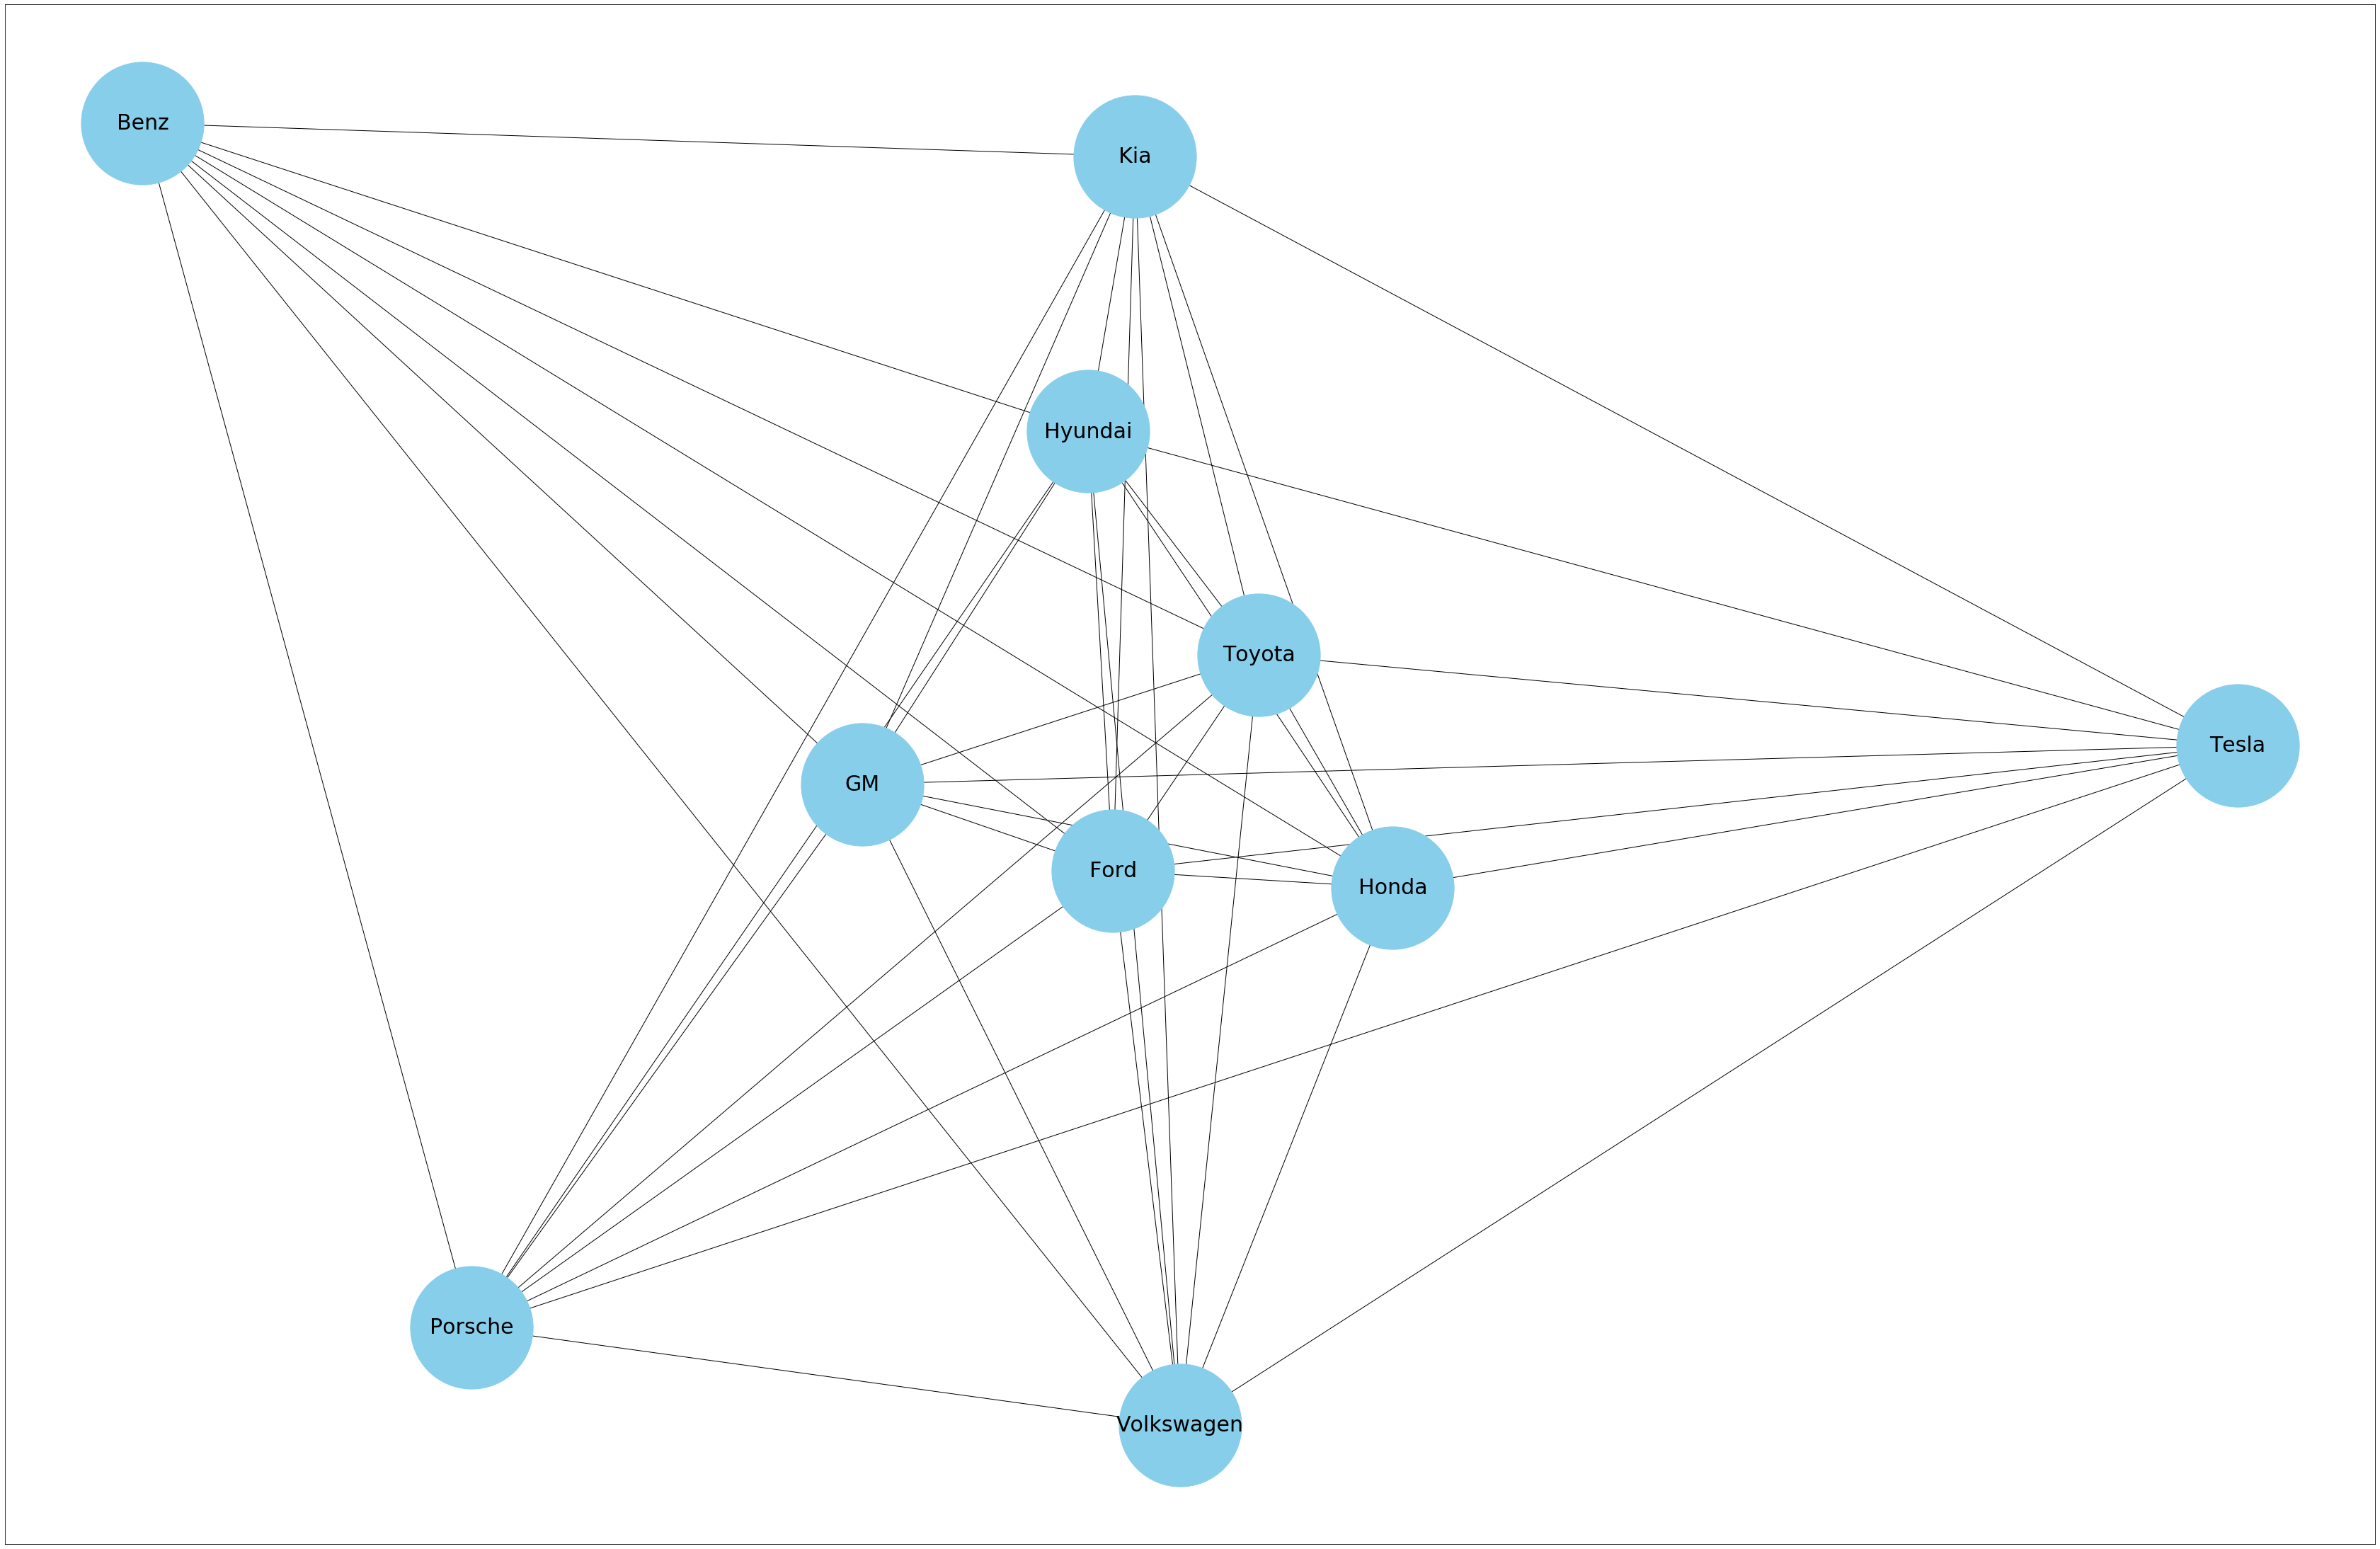

In [35]:
import networkx as nx 
import matplotlib.pyplot as plt
plt.figure(figsize=(60,40))
G = nx.from_pandas_adjacency(DF)
nx.node_attribute_xy
G.name= 'Car Makers'
nx.draw_networkx(G,node_size=30000, node_color='skyblue',font_size=30)

plt.savefig("Car Maker Patent Network_img.png")

In [36]:
G = nx.from_pandas_adjacency(DF)
nx.closeness_centrality(G)

{'Honda': 1.0,
 'Hyundai': 1.0,
 'GM': 1.0,
 'Tesla': 0.9,
 'Ford': 1.0,
 'Toyota': 1.0,
 'Kia': 1.0,
 'Benz': 0.9,
 'Porsche': 1.0,
 'Volkswagen': 1.0}

In [37]:
nx.degree_centrality(G)

{'Honda': 1.222222222222222,
 'Hyundai': 1.222222222222222,
 'GM': 1.222222222222222,
 'Tesla': 1.1111111111111112,
 'Ford': 1.222222222222222,
 'Toyota': 1.222222222222222,
 'Kia': 1.222222222222222,
 'Benz': 1.1111111111111112,
 'Porsche': 1.222222222222222,
 'Volkswagen': 1.222222222222222}

In [38]:
nx.eigenvector_centrality_numpy(G)
centrality = []
for i,j in zip(  nx.eigenvector_centrality_numpy(G).keys(), nx.eigenvector_centrality_numpy(G).values()):
    centrality.append((i ,round(j,6)))
centrality

[('Honda', 0.321957),
 ('Hyundai', 0.321957),
 ('GM', 0.321957),
 ('Tesla', 0.292188),
 ('Ford', 0.321957),
 ('Toyota', 0.321957),
 ('Kia', 0.321957),
 ('Benz', 0.292188),
 ('Porsche', 0.321957),
 ('Volkswagen', 0.321957)]

In [39]:
nx.betweenness_centrality(G,weight =True)

{'Honda': 0.003472222222222222,
 'Hyundai': 0.003472222222222222,
 'GM': 0.003472222222222222,
 'Tesla': 0.0,
 'Ford': 0.003472222222222222,
 'Toyota': 0.003472222222222222,
 'Kia': 0.003472222222222222,
 'Benz': 0.0,
 'Porsche': 0.003472222222222222,
 'Volkswagen': 0.003472222222222222}


## 분석 결과 
    GM, Toyota, Ford, Honda가 중앙에 위치하고 그와 가까이 현대, 포르쉐가 위치하고 있습니다.
    반면에 벤츠, 테슬라, 폭스바겐은 중앙과는 조금 거리가 떨어진 네트워크를 형성합니다. 

    이를 통해 시사할 수 있는 점은 
    Toyata, GM, Ford, Honda의 특허들이 서로 인용한 특허를 많이 사용하였습니다.

    벤츠, 폭스바겐, 테슬라는 위의 회사들과의 공통 특허가 상대적으로 적다는 것을 의미합니다.
    국가별로는 미국 – 일본의 공통인용특허가 많습니다. 
    그 다음으로는 미국,일본 – 한국 그리고,  미국,일본,한국 – 독일 의 관계입니다.

    이를 통해 미국과 일본 자동차 업체 (Toyata, GM, Ford, Honda)의 공통 인용 특허가 많음을 확인할 수 있었습니다.

    또한 eigenvector_centrality를 구했을때, 
    (Benz ,Tesla :  0.292188) , (Toyata, GM, Ford, Honda, Hyundai, Kia : 0.321957) 값이 나왔습니다.
